# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.3960016759130713, performing 69.9 it/sec
Step 100: Loss = 3.1570626111241098, performing 167.0 it/sec
Step 200: Loss = 0.5827520996890995, performing 112.7 it/sec
Step 300: Loss = 0.4737914683374411, performing 110.9 it/sec
Step 400: Loss = 0.3940624587891617, performing 102.9 it/sec
Step 500: Loss = 0.3104531061323277, performing 105.7 it/sec
Step 600: Loss = 0.2227219289874525, performing 100.9 it/sec
Step 700: Loss = 0.1347890947362642, performing 105.8 it/sec
Step 800: Loss = 0.0476644835374761, performing 113.2 it/sec
No improvement since Step 847, early stopping.
[Best]  Step 846: Loss = 0.0104729674952963
[Final] Step 896: Loss = 0.0106380356165982

predicted end states
------------------------------------
         5th       Mean      95th
LF2B-1  4.22e-03  4.22e-03  4.22e-03
LF2B-2  3.83e-11  3.90e-11  3.97e-11
LF2B-3  4

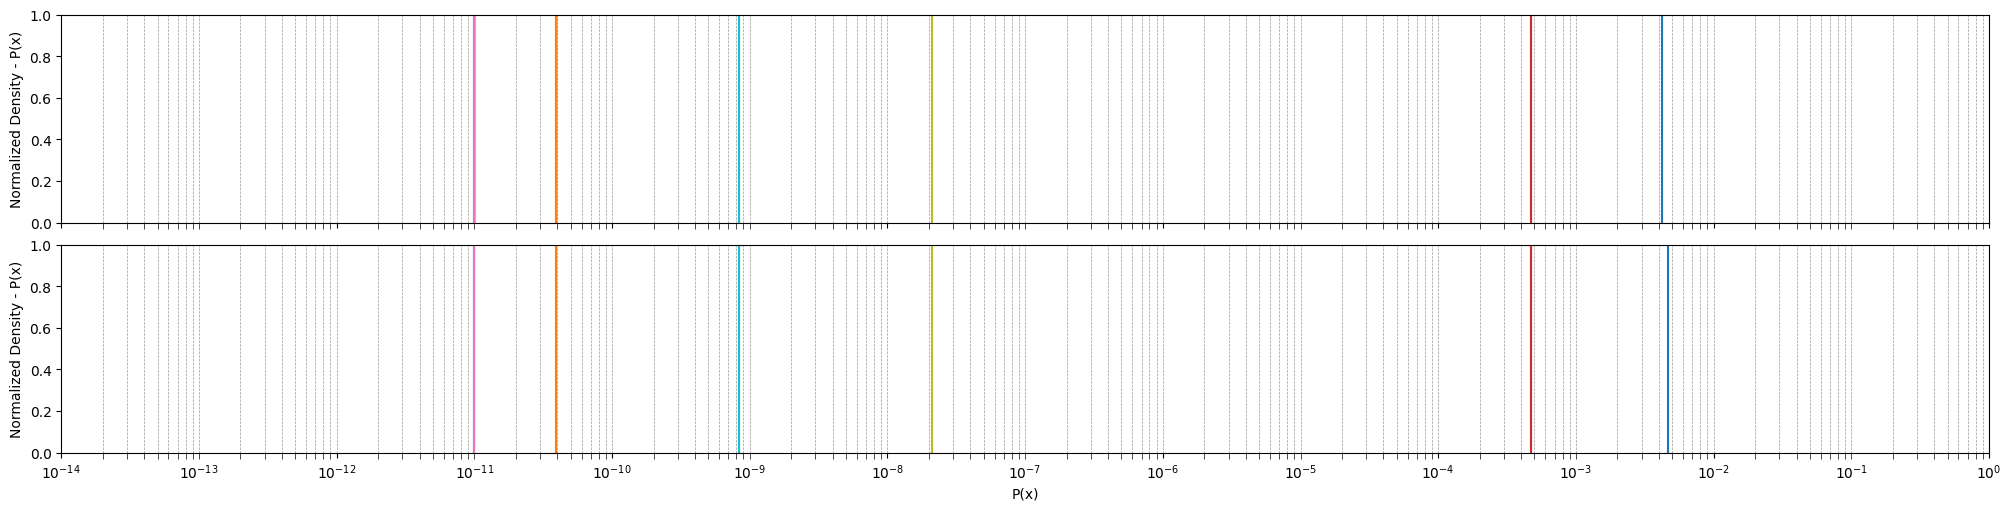

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 4.7e-3,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF2B', 'FSIG', 'FROD', 'BPHR', 'DHRS', 'DHRL|DHRS', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LF2B-1': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 0],
        'probability': 4.7e-3,
    },
    'LF2B-2': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 1],
        'probability': 3.9e-11,
    },
    'LF2B-3': {
        'sequence': [1, 0, 0, 1, 0, 0, np.nan],
        'probability': 4.7e-4,  # frequency unknown
    },
    'LF2B-4': {
        'sequence': [1, 0, 0, 1, 0, 1, np.nan],
        'probability': 1.0e-11,
    },
    'LF2B-5': {
        'sequence': [1, 0, 0, 1, 1, np.nan, np.nan],
        'probability': 1.0e-11,
    },
    'LF2B-6': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.1e-8,
    },
    'LF2B-7': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.3e-10,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)